In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Using Neural Network

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import StandardScaler
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
scaler = StandardScaler()
df_features = scaler.fit_transform(X=df_features)

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_targets = df.species.to_numpy().reshape(-1,1)
df_targets = encoder.fit_transform(df_targets)
df_targets = df_targets.toarray()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_targets, test_size=0.33, random_state=42)

In [7]:
# modeling 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import backend as K

In [8]:
dimData = X_train.shape[1]
nClasses = y_train.shape[1]
advanced_act = LeakyReLU(alpha=.003)
model_reg = Sequential()
model_reg.add(Dense(10, activation= advanced_act , input_shape=(dimData,)))
model_reg.add(Dense(nClasses, activation='softmax'))


In [9]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.3374481 ,  0.24576902, -0.07178831,  0.08259106,  0.37321436,
         -0.5216061 , -0.05615598,  0.49175274, -0.20162809, -0.5458854 ],
        [ 0.5300033 , -0.0722096 ,  0.43999124,  0.17729181, -0.49336472,
         -0.5994754 ,  0.16501367,  0.4097787 , -0.22300875, -0.65335166],
        [-0.22870341,  0.6261735 , -0.39967626, -0.56063384,  0.54589915,
          0.35637772,  0.00788307,  0.5396651 ,  0.22466463, -0.5572202 ],
        [-0.22580215, -0.39522076, -0.48843363,  0.03232592, -0.15647134,
         -0.03657413, -0.18513742, -0.6015463 ,  0.50528324,  0.6207892 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[ 0.6149384 ,  0.27815312,  0.01104999],
        [-0.22913083,  0.18394381, -0.6617936 ],
        [-0.502034

In [10]:
model_reg.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_reg = model_reg.fit(X_train, y_train, batch_size=256, epochs=500, verbose=2,
                        validation_data=(X_test, y_test))

Epoch 1/500
1/1 - 0s - loss: 1.3335 - accuracy: 0.3200 - val_loss: 1.3039 - val_accuracy: 0.4200
Epoch 2/500
1/1 - 0s - loss: 1.3254 - accuracy: 0.3200 - val_loss: 1.2948 - val_accuracy: 0.4200
Epoch 3/500
1/1 - 0s - loss: 1.3172 - accuracy: 0.3200 - val_loss: 1.2858 - val_accuracy: 0.4200
Epoch 4/500
1/1 - 0s - loss: 1.3091 - accuracy: 0.3200 - val_loss: 1.2768 - val_accuracy: 0.4200
Epoch 5/500
1/1 - 0s - loss: 1.3011 - accuracy: 0.3200 - val_loss: 1.2678 - val_accuracy: 0.4200
Epoch 6/500
1/1 - 0s - loss: 1.2930 - accuracy: 0.3200 - val_loss: 1.2589 - val_accuracy: 0.4200
Epoch 7/500
1/1 - 0s - loss: 1.2850 - accuracy: 0.3400 - val_loss: 1.2500 - val_accuracy: 0.4200
Epoch 8/500
1/1 - 0s - loss: 1.2771 - accuracy: 0.3400 - val_loss: 1.2411 - val_accuracy: 0.4200
Epoch 9/500
1/1 - 0s - loss: 1.2691 - accuracy: 0.3400 - val_loss: 1.2323 - val_accuracy: 0.4200
Epoch 10/500
1/1 - 0s - loss: 1.2612 - accuracy: 0.3400 - val_loss: 1.2235 - val_accuracy: 0.4200
Epoch 11/500
1/1 - 0s - loss:

Epoch 85/500
1/1 - 0s - loss: 0.7883 - accuracy: 0.7500 - val_loss: 0.7209 - val_accuracy: 0.7200
Epoch 86/500
1/1 - 0s - loss: 0.7837 - accuracy: 0.7500 - val_loss: 0.7163 - val_accuracy: 0.7200
Epoch 87/500
1/1 - 0s - loss: 0.7791 - accuracy: 0.7500 - val_loss: 0.7118 - val_accuracy: 0.7200
Epoch 88/500
1/1 - 0s - loss: 0.7746 - accuracy: 0.7500 - val_loss: 0.7074 - val_accuracy: 0.7200
Epoch 89/500
1/1 - 0s - loss: 0.7701 - accuracy: 0.7500 - val_loss: 0.7030 - val_accuracy: 0.7200
Epoch 90/500
1/1 - 0s - loss: 0.7657 - accuracy: 0.7400 - val_loss: 0.6987 - val_accuracy: 0.7200
Epoch 91/500
1/1 - 0s - loss: 0.7612 - accuracy: 0.7400 - val_loss: 0.6944 - val_accuracy: 0.7200
Epoch 92/500
1/1 - 0s - loss: 0.7568 - accuracy: 0.7400 - val_loss: 0.6901 - val_accuracy: 0.7200
Epoch 93/500
1/1 - 0s - loss: 0.7525 - accuracy: 0.7400 - val_loss: 0.6859 - val_accuracy: 0.7200
Epoch 94/500
1/1 - 0s - loss: 0.7481 - accuracy: 0.7400 - val_loss: 0.6818 - val_accuracy: 0.7200
Epoch 95/500
1/1 - 0

Epoch 168/500
1/1 - 0s - loss: 0.5189 - accuracy: 0.8900 - val_loss: 0.4745 - val_accuracy: 0.8200
Epoch 169/500
1/1 - 0s - loss: 0.5167 - accuracy: 0.8900 - val_loss: 0.4726 - val_accuracy: 0.8200
Epoch 170/500
1/1 - 0s - loss: 0.5146 - accuracy: 0.9000 - val_loss: 0.4708 - val_accuracy: 0.8200
Epoch 171/500
1/1 - 0s - loss: 0.5124 - accuracy: 0.9000 - val_loss: 0.4690 - val_accuracy: 0.8200
Epoch 172/500
1/1 - 0s - loss: 0.5103 - accuracy: 0.9000 - val_loss: 0.4671 - val_accuracy: 0.8200
Epoch 173/500
1/1 - 0s - loss: 0.5082 - accuracy: 0.9000 - val_loss: 0.4654 - val_accuracy: 0.8200
Epoch 174/500
1/1 - 0s - loss: 0.5061 - accuracy: 0.9000 - val_loss: 0.4636 - val_accuracy: 0.8200
Epoch 175/500
1/1 - 0s - loss: 0.5040 - accuracy: 0.9000 - val_loss: 0.4618 - val_accuracy: 0.8200
Epoch 176/500
1/1 - 0s - loss: 0.5019 - accuracy: 0.9000 - val_loss: 0.4601 - val_accuracy: 0.8200
Epoch 177/500
1/1 - 0s - loss: 0.4998 - accuracy: 0.9000 - val_loss: 0.4583 - val_accuracy: 0.8200
Epoch 178/

Epoch 251/500
1/1 - 0s - loss: 0.3840 - accuracy: 0.9100 - val_loss: 0.3592 - val_accuracy: 0.8600
Epoch 252/500
1/1 - 0s - loss: 0.3828 - accuracy: 0.9100 - val_loss: 0.3582 - val_accuracy: 0.8600
Epoch 253/500
1/1 - 0s - loss: 0.3817 - accuracy: 0.9100 - val_loss: 0.3572 - val_accuracy: 0.8600
Epoch 254/500
1/1 - 0s - loss: 0.3805 - accuracy: 0.9100 - val_loss: 0.3562 - val_accuracy: 0.8600
Epoch 255/500
1/1 - 0s - loss: 0.3794 - accuracy: 0.9100 - val_loss: 0.3552 - val_accuracy: 0.8600
Epoch 256/500
1/1 - 0s - loss: 0.3782 - accuracy: 0.9100 - val_loss: 0.3542 - val_accuracy: 0.8600
Epoch 257/500
1/1 - 0s - loss: 0.3771 - accuracy: 0.9100 - val_loss: 0.3532 - val_accuracy: 0.8600
Epoch 258/500
1/1 - 0s - loss: 0.3760 - accuracy: 0.9100 - val_loss: 0.3522 - val_accuracy: 0.8600
Epoch 259/500
1/1 - 0s - loss: 0.3748 - accuracy: 0.9100 - val_loss: 0.3512 - val_accuracy: 0.8600
Epoch 260/500
1/1 - 0s - loss: 0.3737 - accuracy: 0.9100 - val_loss: 0.3502 - val_accuracy: 0.8600
Epoch 261/

Epoch 334/500
1/1 - 0s - loss: 0.3074 - accuracy: 0.9200 - val_loss: 0.2899 - val_accuracy: 0.9000
Epoch 335/500
1/1 - 0s - loss: 0.3066 - accuracy: 0.9200 - val_loss: 0.2892 - val_accuracy: 0.9000
Epoch 336/500
1/1 - 0s - loss: 0.3059 - accuracy: 0.9200 - val_loss: 0.2885 - val_accuracy: 0.9000
Epoch 337/500
1/1 - 0s - loss: 0.3052 - accuracy: 0.9200 - val_loss: 0.2878 - val_accuracy: 0.9000
Epoch 338/500
1/1 - 0s - loss: 0.3045 - accuracy: 0.9200 - val_loss: 0.2872 - val_accuracy: 0.9000
Epoch 339/500
1/1 - 0s - loss: 0.3038 - accuracy: 0.9200 - val_loss: 0.2865 - val_accuracy: 0.9000
Epoch 340/500
1/1 - 0s - loss: 0.3030 - accuracy: 0.9200 - val_loss: 0.2858 - val_accuracy: 0.9000
Epoch 341/500
1/1 - 0s - loss: 0.3023 - accuracy: 0.9200 - val_loss: 0.2851 - val_accuracy: 0.9000
Epoch 342/500
1/1 - 0s - loss: 0.3016 - accuracy: 0.9200 - val_loss: 0.2844 - val_accuracy: 0.9000
Epoch 343/500
1/1 - 0s - loss: 0.3009 - accuracy: 0.9200 - val_loss: 0.2838 - val_accuracy: 0.9000
Epoch 344/

Epoch 417/500
1/1 - 0s - loss: 0.2553 - accuracy: 0.9200 - val_loss: 0.2385 - val_accuracy: 0.9600
Epoch 418/500
1/1 - 0s - loss: 0.2548 - accuracy: 0.9200 - val_loss: 0.2380 - val_accuracy: 0.9600
Epoch 419/500
1/1 - 0s - loss: 0.2542 - accuracy: 0.9200 - val_loss: 0.2374 - val_accuracy: 0.9600
Epoch 420/500
1/1 - 0s - loss: 0.2537 - accuracy: 0.9200 - val_loss: 0.2369 - val_accuracy: 0.9600
Epoch 421/500
1/1 - 0s - loss: 0.2532 - accuracy: 0.9200 - val_loss: 0.2363 - val_accuracy: 0.9600
Epoch 422/500
1/1 - 0s - loss: 0.2526 - accuracy: 0.9200 - val_loss: 0.2358 - val_accuracy: 0.9600
Epoch 423/500
1/1 - 0s - loss: 0.2521 - accuracy: 0.9200 - val_loss: 0.2352 - val_accuracy: 0.9600
Epoch 424/500
1/1 - 0s - loss: 0.2516 - accuracy: 0.9200 - val_loss: 0.2347 - val_accuracy: 0.9600
Epoch 425/500
1/1 - 0s - loss: 0.2510 - accuracy: 0.9200 - val_loss: 0.2341 - val_accuracy: 0.9600
Epoch 426/500
1/1 - 0s - loss: 0.2505 - accuracy: 0.9200 - val_loss: 0.2336 - val_accuracy: 0.9600
Epoch 427/

Epoch 500/500
1/1 - 0s - loss: 0.2157 - accuracy: 0.9300 - val_loss: 0.1974 - val_accuracy: 0.9600


Text(0.5, 1.0, 'Loss Curves')

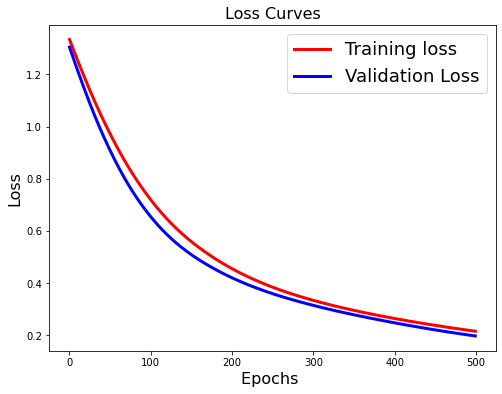

In [11]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['loss'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

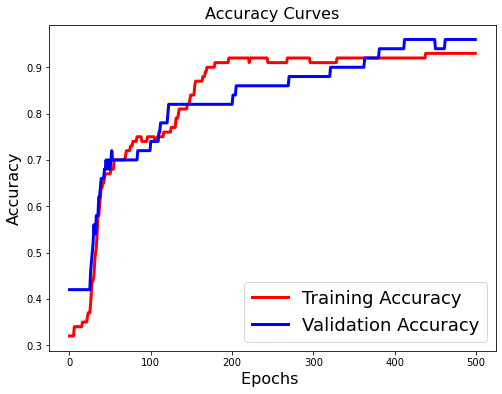

In [12]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(mlp_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(mlp_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Using Genetic Algorithm

In [13]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.5619851 ,  0.08859561,  0.09344745, -0.1373557 ,  0.5266162 ,
         -0.29408818, -0.32625344,  0.7256987 , -0.01689658, -0.7242505 ],
        [ 0.7110084 , -0.4219903 ,  0.29099357,  0.37731853, -0.33684593,
         -0.5957344 ,  0.43923762,  0.1765014 , -0.14307556, -0.4523277 ],
        [-0.4525394 ,  0.45990616, -0.23566261, -0.7858708 ,  0.9240363 ,
          0.7013055 , -0.3049924 ,  0.8408486 ,  0.6574178 , -0.76782453],
        [-0.44932875, -0.67364997, -0.32388803, -0.19500108,  0.24569581,
          0.31256372, -0.49983168, -0.2741871 ,  0.9691269 ,  0.40077776]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.21393023,  0.53830755, -0.16390516,  0.20468865, -0.256238  ,
         0.16514464,  0.08192247,  0.3285069 , -0.38436994, -0.18572466],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [14]:
# creating  population with random weights
population_size = 50
# W1 size(4,10)  ip-hidden
# W2 size (10,)  act hidden
# W3 size (10,3) hidden-output
# W4 size (3) output act

# generate this for 50 population
W1_shape = K.eval(model_reg.weights[0]).shape
W2_shape = K.eval(model_reg.weights[1]).shape
W3_shape = K.eval(model_reg.weights[2]).shape
W4_shape = K.eval(model_reg.weights[3]).shape

W1 =np.random.randn(W1_shape[0],W1_shape[1])
W2 =np.random.randn(W2_shape[0])
W3 =np.random.randn(W3_shape[0],W3_shape[1])
W4 =np.random.randn(W4_shape[0])


In [15]:
model_reg.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.5619851 ,  0.08859561,  0.09344745, -0.1373557 ,  0.5266162 ,
         -0.29408818, -0.32625344,  0.7256987 , -0.01689658, -0.7242505 ],
        [ 0.7110084 , -0.4219903 ,  0.29099357,  0.37731853, -0.33684593,
         -0.5957344 ,  0.43923762,  0.1765014 , -0.14307556, -0.4523277 ],
        [-0.4525394 ,  0.45990616, -0.23566261, -0.7858708 ,  0.9240363 ,
          0.7013055 , -0.3049924 ,  0.8408486 ,  0.6574178 , -0.76782453],
        [-0.44932875, -0.67364997, -0.32388803, -0.19500108,  0.24569581,
          0.31256372, -0.49983168, -0.2741871 ,  0.9691269 ,  0.40077776]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.21393023,  0.53830755, -0.16390516,  0.20468865, -0.256238  ,
         0.16514464,  0.08192247,  0.3285069 , -0.38436994, -0.18572466],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 3) dtype=float32, numpy=
 array([[

In [16]:
print(W1)
print(W2)
print(W3)
print(W4)

[[-1.51050736  0.2227387  -0.1743673  -1.3486249   0.37125851 -0.08863944
   0.4805041  -0.3029338  -1.40509963 -0.22226914]
 [-0.13716059  1.2050142  -0.06821673 -0.23002001  0.73381488 -1.52805279
  -2.41344038 -0.23908503  0.43689588  0.60477289]
 [-1.5203324  -1.19714034 -1.23528363 -1.08544303  0.02213683  0.09423957
   1.25227335  0.41804553 -0.14984511  0.32330179]
 [-0.50675     0.43444367  1.79170438  0.27293448  0.92704042  2.00804109
  -1.14714191 -0.52251665 -0.28921589 -1.11237983]]
[-0.3616743   1.61372471 -2.10916877 -1.07809526  1.28192359  0.43996501
  0.96203323 -0.31126611 -0.66630924 -0.69374245]
[[ 0.46300157 -1.44696728 -0.87255327]
 [ 0.27290161 -1.33158345 -0.47624066]
 [ 0.58927805  1.20957767  1.48018235]
 [ 0.93295249  0.93698366  1.66323155]
 [ 1.05789966 -1.1093223  -0.85934865]
 [ 0.44652941 -0.55421167 -1.27066439]
 [-0.38749546  0.12357811 -1.17820518]
 [ 1.2507817   0.04695549  1.41811165]
 [ 1.48493895 -2.38341914 -1.08810096]
 [ 0.76173039 -0.08217297

In [17]:
class Gene:
    def __init__(self,W1_shape,W2_shape,W3_shape,W4_shape):
        self.W1 =np.random.randn(W1_shape[0],W1_shape[1])
        self.W2 =np.random.randn(W2_shape[0])
        self.W3 =np.random.randn(W3_shape[0],W3_shape[1])
        self.W4 =np.random.randn(W4_shape[0])
        
    def show_gene(self):
        print(self.W1)
        print(self.W2)
        print(self.W3)
        print(self.W4)
        

In [127]:
class genetic_algo:
    def __init__(self,pop_size):
        self.popualtion_size = pop_size
        self.gene = []
        self.fitness_score = {}
        
    # generate population
    def generate_population(self,W1_shape,W2_shape,W3_shape,W4_shape):
        for i in range(self.popualtion_size):
            self.gene.append(Gene(W1_shape,W2_shape,W3_shape,W4_shape))
    
    # set weight
    def set_model_weights(self,model1,W1,W2,W3,W4):
        model1.layers[0].set_weights([W1,W2])
        model1.layers[1].set_weights([W3,W4])
        return model1
        
    #Foward propagate function
    def forward_propagate(self,model,X_train,y_train):
        
        for pop in range(self.popualtion_size):
            model = self.set_model_weights(model,self.gene[pop].W1,self.gene[pop].W2,self.gene[pop].W3,self.gene[pop].W4)
            step=0
            total_loss = 0
            loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
            for x_batch_train, y_batch_train in zip(X_train,y_train):
                logits = model(x_batch_train.reshape(1,-1))
                y_true = y_batch_train
                count=0
                for i in range(len(y_true)):
                    if y_true[i]==1:
                        break
                    count+=1
                loss_value = loss_fn(count, logits)
                total_loss+=loss_value
                #print("Training loss at step %d: %.4f" % (step, float(loss_value)))
                step+=1
            avg_loss = total_loss/len(X_train)
            print(" Gene %d: Average trainning loss is %f"%(pop,avg_loss))
            self.fitness_score[pop]=avg_loss
        return self.fitness_score
    
    #Natural_Selection
    def natural_selection(self,selection_percent,size):
        fitness = dict(sorted(self.fitness_score.items(), key=lambda item: item[1]))
        fitness_items = fitness.items()
        selection_range = int(selection_percent/100*size)
        selected_dict = list(fitness_items)[:selection_range]
        selected_dict = dict(selected_dict)
        return selected_dict # best genes are selected
    
    #breed and mutation
    def breed(self,parent1,parent2,max_mutation,mutation_rate):
        off_spring = Gene(parent1.W1.shape,parent1.W2.shape,parent1.W3.shape,parent1.W4.shape)
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W1 = parent1.W1 if random.randrange(0,10) < 5 else parent2.W1
        else:
            off_spring.W1 = np.random.randn(parent1.W1.shape[0],parent1.W1.shape[1])
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W2 = parent1.W2 if random.randrange(0,10) < 5 else parent2.W2
        else:
            off_spring.W2 = np.random.randn(parent1.W2.shape[0])
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W3 = parent1.W3 if random.randrange(0,10) < 5 else parent2.W3
        else:
            off_spring.W3 = np.random.randn(parent1.W3.shape[0],parent1.W3.shape[1])
        
        if(random.randrange(0,max_mutation) > mutation_rate):
            off_spring.W4 = parent1.W4 if random.randrange(0,10) < 5 else parent2.W4
        else:
            off_spring = np.random.randn(parent1.W4.shape[0])
            
        return off_spring
       
    #CrossOver
    #def cross_over(self):
    


In [128]:
Population = genetic_algo(50)

In [129]:
Population.generate_population(W1_shape,W2_shape,W3_shape,W4_shape)

In [130]:
fitness = Population.forward_propagate(model_reg,X_train,y_train)

 Gene 0: Average trainning loss is 1.183378
 Gene 1: Average trainning loss is 1.395004
 Gene 2: Average trainning loss is 0.979729
 Gene 3: Average trainning loss is 1.106617
 Gene 4: Average trainning loss is 1.196243
 Gene 5: Average trainning loss is 1.012541
 Gene 6: Average trainning loss is 1.153660
 Gene 7: Average trainning loss is 0.896700
 Gene 8: Average trainning loss is 1.246354
 Gene 9: Average trainning loss is 1.370041
 Gene 10: Average trainning loss is 1.192274
 Gene 11: Average trainning loss is 0.990166
 Gene 12: Average trainning loss is 1.023755
 Gene 13: Average trainning loss is 1.122539
 Gene 14: Average trainning loss is 1.345123
 Gene 15: Average trainning loss is 1.201915
 Gene 16: Average trainning loss is 1.364975
 Gene 17: Average trainning loss is 1.179582
 Gene 18: Average trainning loss is 1.230524
 Gene 19: Average trainning loss is 1.124070
 Gene 20: Average trainning loss is 0.937604
 Gene 21: Average trainning loss is 1.198739
 Gene 22: Average tr

In [131]:
Population.natural_selection(10,len(X_train))

{29: <tf.Tensor: shape=(), dtype=float32, numpy=0.825265>,
 31: <tf.Tensor: shape=(), dtype=float32, numpy=0.859085>,
 7: <tf.Tensor: shape=(), dtype=float32, numpy=0.8967004>,
 23: <tf.Tensor: shape=(), dtype=float32, numpy=0.92134416>,
 22: <tf.Tensor: shape=(), dtype=float32, numpy=0.93257743>,
 20: <tf.Tensor: shape=(), dtype=float32, numpy=0.93760407>,
 26: <tf.Tensor: shape=(), dtype=float32, numpy=0.9565816>,
 28: <tf.Tensor: shape=(), dtype=float32, numpy=0.9669983>,
 2: <tf.Tensor: shape=(), dtype=float32, numpy=0.9797293>,
 42: <tf.Tensor: shape=(), dtype=float32, numpy=0.98274046>}

In [132]:
fitness = dict(sorted(fitness.items(), key=lambda item: item[1]))

In [133]:
fitness

{29: <tf.Tensor: shape=(), dtype=float32, numpy=0.825265>,
 31: <tf.Tensor: shape=(), dtype=float32, numpy=0.859085>,
 7: <tf.Tensor: shape=(), dtype=float32, numpy=0.8967004>,
 23: <tf.Tensor: shape=(), dtype=float32, numpy=0.92134416>,
 22: <tf.Tensor: shape=(), dtype=float32, numpy=0.93257743>,
 20: <tf.Tensor: shape=(), dtype=float32, numpy=0.93760407>,
 26: <tf.Tensor: shape=(), dtype=float32, numpy=0.9565816>,
 28: <tf.Tensor: shape=(), dtype=float32, numpy=0.9669983>,
 2: <tf.Tensor: shape=(), dtype=float32, numpy=0.9797293>,
 42: <tf.Tensor: shape=(), dtype=float32, numpy=0.98274046>,
 11: <tf.Tensor: shape=(), dtype=float32, numpy=0.9901664>,
 5: <tf.Tensor: shape=(), dtype=float32, numpy=1.0125409>,
 12: <tf.Tensor: shape=(), dtype=float32, numpy=1.0237546>,
 25: <tf.Tensor: shape=(), dtype=float32, numpy=1.0295854>,
 30: <tf.Tensor: shape=(), dtype=float32, numpy=1.0362847>,
 48: <tf.Tensor: shape=(), dtype=float32, numpy=1.0789189>,
 49: <tf.Tensor: shape=(), dtype=float32,

In [134]:
s_list = list(Population.natural_selection(10,len(X_train)))
s_list

[29, 31, 7, 23, 22, 20, 26, 28, 2, 42]

In [185]:
offspring = Population.breed(Population.gene[s_list[0]],Population.gene[s_list[1]],1000,5)

In [162]:
offspring.show_gene()

[[ 0.61874359  0.07659569 -1.09909139 -0.90579413 -1.28609954 -1.36031397
  -0.3560022   1.36756464 -0.56883377  0.11757664]
 [-0.36670901 -1.46099893  1.15428626  0.69500463 -0.09917981 -0.23876384
   0.28594456  0.35597244 -0.3061603   1.27075432]
 [ 0.04718967  0.62833782  1.42778005  2.42119156  1.34933826 -0.71210042
   1.42976984  0.10413283  0.71511279  0.86889119]
 [-0.33442066 -1.508212    0.2738513  -0.98565175  0.09901237  1.39758607
   1.55652728  2.07109903 -1.97438188  0.02359294]]
[ 0.3268734   0.13711956 -2.07546357  0.70682242 -0.72857878 -0.12740833
 -1.15583828 -0.44868199 -0.87604447  1.47322441]
[[ 0.71926046  0.61403117 -1.53469322]
 [-0.61057685  0.0706139   1.44659714]
 [-0.32078832  1.69709943  0.60956942]
 [ 1.59334822 -1.35426503  0.44781888]
 [ 0.14511129 -0.87199423 -0.20245209]
 [ 0.74033964 -0.70012842  0.99739609]
 [ 0.13355982 -1.11004244 -0.43952679]
 [ 1.31276161  1.19992486  1.06499596]
 [ 0.39777339 -0.18316936 -0.50233584]
 [-0.20477022  0.60958013

In [186]:
model = Population.set_model_weights(model_reg,offspring.W1,offspring.W2,offspring.W3,offspring.W4)
step=0
total_loss = 0
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
for x_batch_train, y_batch_train in zip(X_train,y_train):
    logits = model(x_batch_train.reshape(1,-1))
    y_true = y_batch_train
    count=0
    for i in range(len(y_true)):
        if y_true[i]==1:
            break
        count+=1
    loss_value = loss_fn(count, logits)
    total_loss+=loss_value
    #print("Training loss at step %d: %.4f" % (step, float(loss_value)))
    step+=1
avg_loss = total_loss/len(X_train)
print(" Gene 1: Average trainning loss is %f"%(avg_loss))

 Gene 1: Average trainning loss is 1.292973
